# NumPy Exercise: Correlated Gaussian Random Variables

In many situations, we need to have a series of correlated Gaussian random variables, which can then be transformed into other distributions of interest (uniform, lognormal, etc.). Let's see how to do that with NumPy in Python.

### Given:  

|Variable | Value | Description |
| ---: | :---: | :--- |
|`n_real` | `1E6` | number of realizations|
|`n_vars` | 3 | number of variables to correlate|
|`cov` | `[[ 1. ,  0.2,  0.4], [ 0.2,  0.8,  0.3], [ 0.4,  0.3,  1.1]]` | covariance matrix|

### Theory

The procedure for generating correlated Gaussian is as follows:  
1. Sample `[n_vars x n_real]` (uncorrelated) normal random variables
2. Calculate `chol_mat`, the Cholesky decomposition of the covariance matrix
3. Matrix-multiply your random variables with `chol_mat` to produce a `[n_vars x n_real]` array of correlated Gaussian variables

### Exercise

Do the following:  
1. Fill in the blank cells below so that the code follows the theory outlined above.
2. Calculate the variances of the three samples of random variables. Does it match the diagonal of the covariance matrix?
3. Calculate the correlation coefficient between the first and second random samples. Does it match `cov[0, 1]`?

### Hints

- In the arrays of random variables, each row `i` corresponds to a *sample* of random variable `i` (just FYI).
- Google is your friend :)

In [48]:
  # import any needed modules here
import numpy as np
import matplotlib.pyplot as plt

In [30]:
n_real =  int(1E6) # number of realizations
n_vars =  3 # number of random variables we want to correlate
cov =  np.array([[1., 0.2, 0.4], [0.2, 0.8, 0.3], [0.4, 0.3, 1.1]]) # covariance matrix
print(cov)


[[1.  0.2 0.4]
 [0.2 0.8 0.3]
 [0.4 0.3 1.1]]


In [36]:
unc_vars =  np.random.standard_normal((n_vars,n_real)) # create [n_vars x n_real] array of uncorrelated (unc) normal random variables
print(unc_vars.shape)

(3, 1000000)


In [34]:
chol_mat =  np.linalg.cholesky(cov) # calculate the cholesky decomposition of the covariance matrix
print(chol_mat)

[[1.         0.         0.        ]
 [0.2        0.87177979 0.        ]
 [0.4        0.25235731 0.9361174 ]]


In [52]:
mean = [1, 1, 1]
cor_vars = np.dot(chol_mat,unc_vars) + np.array(mean).reshape(3,1) # [n_vars x n_real] array of correlated (cor) random variables
print(cor_vars.shape)

(3, 1000000)


In [57]:
  # calculate variances of each sample of random variables
# fig, ax = plt.subplots(1, 1, figsize=(6, 3))
# ax.scatter(cor_vars[0,:], cor_vars[1,:])
unc_vars_var = np.var(unc_vars)
print(unc_vars_var)


0.9995245302069801


(6, 6)


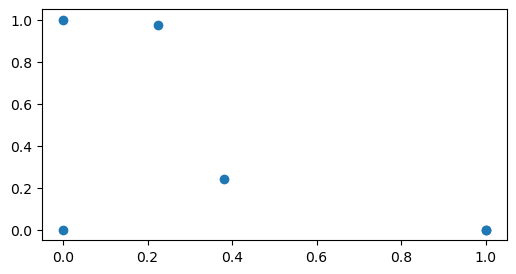

In [69]:
  # calculate the correlation coefficient between the first and second random samples
corr_coef = np.corrcoef(unc_vars,cor_vars)
print(corr_coef.shape)
fig, ax = plt.subplots(1, 1, figsize=(6,3))
ax.scatter(corr_coef[0,:], corr_coef[1,:])